__Exercise__

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

- Measure accuracy of your model using different kernels such as rbf and linear.
- Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
- Use 80% of samples as training data size

In [22]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits() 

In [23]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [24]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

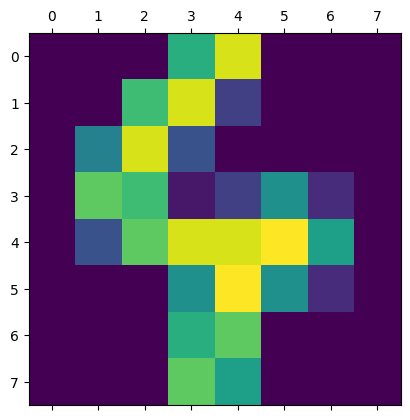

In [25]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[110]) 

In [26]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
len(digits.data)

1797

In [48]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
df['target'] = digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [53]:
df[df.target == 3].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
3,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,13.0,8.0,9.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,14.0,15.0,3.0,0.0,0.0,0.0,0.0,11.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,4.0,0.0,0.0,1.0,5.0,6.0,13.0,16.0,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3
3,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,11.0,8.0,8.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,7.0,0.0,0.0,0.0,0.0,2.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0,7.0,8.0,14.0,15.0,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0,3
3,0.0,0.0,9.0,16.0,13.0,6.0,0.0,0.0,0.0,0.0,6.0,5.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,8.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,4.0,8.0,11.0,15.0,12.0,0.0,0.0,0.0,11.0,14.0,12.0,8.0,0.0,0.0,3
3,0.0,1.0,10.0,15.0,11.0,1.0,0.0,0.0,0.0,3.0,8.0,8.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,15.0,1.0,0.0,0.0,0.0,0.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,3.0,4.0,10.0,16.0,1.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,0.0,0.0,3


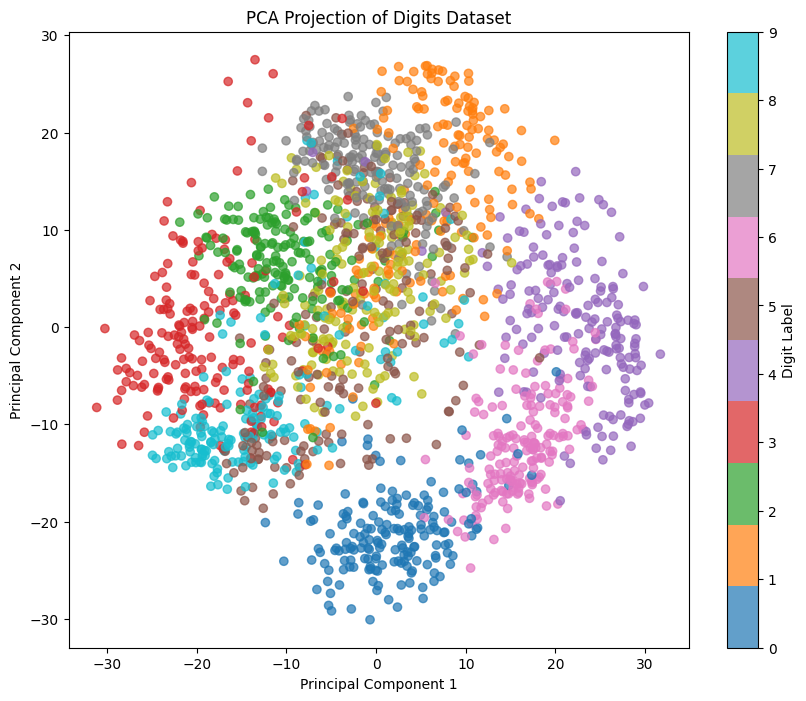

In [ ]:
# Visualise the data in clusters
# PCA and t-SNE are Dimensionality reduction methods
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA Projection of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


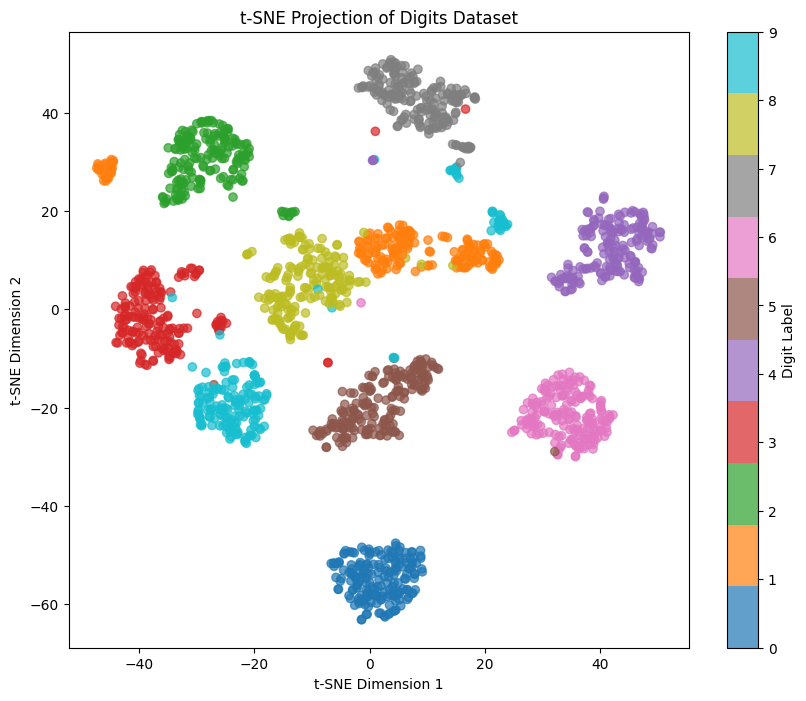

In [63]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(digits.data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=digits.target, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("t-SNE Projection of Digits Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, df.target, test_size=0.3)

In [67]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [69]:
len(X_train)

1257

In [71]:
len(X_test)

540

In [73]:
rbf_model.fit(X_train, y_train)

SVC()

In [75]:
rbf_model.score(X_test, y_test)

0.9944444444444445

In [77]:
linear_model = SVC(kernel='linear')

In [78]:
linear_model.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
linear_model.score(X_test, y_test)

0.9796296296296296